In [100]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import defaultdict
import argparse
import sys
import gzip
from scipy import stats
import scipy as sp
import community

from network_ei import *
from get_motifs import *

import matplotlib.patches as mpatches
from matplotlib import gridspec
from matplotlib._png import read_png
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

%matplotlib inline
plt.rc('axes', axisbelow=True)

# Causal Structure as a Network: Quantifying Certainty in Complex Systems

# Chapter 02: Network Size and Effective Information

## Random Networks
We first examined the effective information of networks with different sizes and structures, asking basic questions about the relationship between a network's $EI$ to its size, number of edges, and network structure. These inquiries eventually allow for the exhaustive classification and quantification of different causal structures. For simplicity and generality, we start by examining the $EI$ in undirected networks.

It is perhaps intuitive that the $EI$ of a network will increase as the network grows in size. The upper bound of $EI$ in a network of $N$ nodes is log$_2(N)$, and adding more nodes should also increase the available repertoire of counterfactuals or states, which should in turn increase the informativeness of the causal structure. While we describe multiple classes of networks where $EI$ grows as a function of network size, this is not always so.

Here, we show a comparison between the number of nodes in a network and that network's $EI$, using two canonical network structures---Erdös-Rényi (ER) random graphs (Erdös & Rényi, 1959; Bollobas, 1984) and Barabási-Albert (BA) networks (Barabasi & Albert, 1999). As both classes of networks grow in size, the BA networks continue increasing in $EI$. Interestingly, the $EI$ in ER networks converges to a value of $-\text{log}_2(p)$, where $p$ is the probability that any two nodes in the network will be connected
____________________________________________________________________________

## Upper and Lower Limits to Effective Information in Networks
The fixed information in random causal structures is fundamental to the notion of causal structures as networks. After a certain point, a causal structure that is grown randomly does not gain information as its size increase. Its $EI$ is dominated solely by the probability that any two nodes will be connected, $p$, such that the $EI$ of a random network will be $-\text{log}_2(p)$. This is not the case in Barabási-Albert (BA) networks. Such a key difference suggests there is something intrinsic to the topology of an organized network where each new node contributes to minimizing uncertainty. That is, $EI$ increases as a function of $N$ if it was created under rules which evince structure (like a BA network), whereas for a network with a random topology it does not.

Here, we will see an important relationship between the $EI$ and a network's density. Sparse, connected networks offer the most certainty about cause and effects and therefore will likely have higher $EI$. As the network becomes more dense, however, we see that the $EI$ drops off. This shift occurs in ER networks at approximately $\langle k \rangle = \text{log}_2(N)$, which is also the point at which we can expect all nodes to be in a giant component (Barabási, 2016). Importantly, if the network is maximally dense (i.e. a fully connected network, with self-loops), $EI=0.00$. However, we expect such dense low-$EI$ structures to not be common, since network structures found in nature and society tend to be sparse (Del Genio, Gross, & Bassler, 2011).

To see the clear relationship between network connectivity and $EI$, compare the $EI$ of $d$-dimensional ring-lattices to that of hub-and-spoke star networks. The two form striking bounds, between which we expect most real networks to fall. That is, for undirected networks, the 1-dimensional ring lattice represents the upper bound where $\langle k \rangle = 2.00$, and the $EI$ scales with $\text{log}_{2}(N) - \text{log}_{2}(2d)$. $N$ is the number of nodes and $d$ is the dimension of the ring-lattice (i.e., $d=1$ is a cycle and is shown in this notebook, $d=2$ is a taurus, etc.). On the opposite end of the spectrum, an all-to-all undirected network have zero $EI$. Comparatively, as the size of star networks increase, their $EI$ approaches 0.00. 

The picture that begins to emerge is that $EI$ is inextricably linked to the pattern of connectivity and therefore the motifs present in the network. In the following section, we explore the $EI$ of three-node directed network motifs in order to understand further why certain structures offer different amounts of information about causes and effects in a system. This also allows us to understand exactly why $EI$ is an appropriate metric of causation.

# 2.0 Network Size and Effective Information
## 2.0.1 Comparing Erdos-Renyi and Barabási-Albert Networks

In [24]:
p0 = 0.0
N = 2000 
network_sizes = np.linspace(10, N, 20, dtype=int)
ms = [2, 7]
ps = [0.01, 0.04] 
n_sim = 5
ei_er = []
ei_ba = []

for i in range(len(ms)):
    ei_er_temp = []
    ei_ba_temp = []
    for N in network_sizes:
        temp_ba = 0
        temp_er = 0
        for num_sim in range(n_sim):
            Gba = nx.barabasi_albert_graph(N, ms[i])
            Ger = nx.erdos_renyi_graph(N, ps[i])
            temp_ba += get_ei(Gba, p0)
            temp_er += get_ei(Ger, p0)
        
        ei_er_temp.append(temp_er/n_sim)
        ei_ba_temp.append(temp_ba/n_sim)

    ei_er.append(ei_er_temp)
    ei_ba.append(ei_ba_temp)

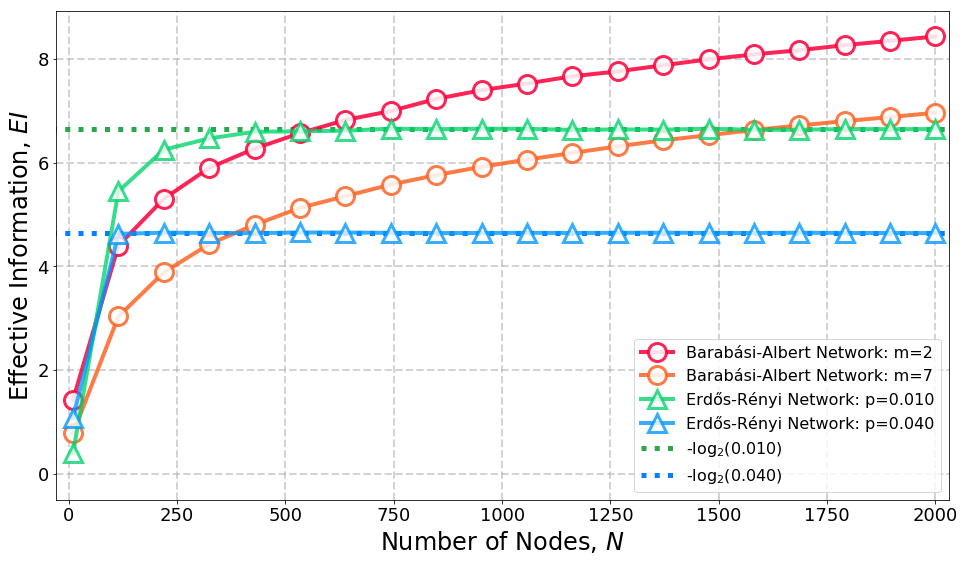

In [27]:
plt.figure(figsize = (16,9))
plt.plot(network_sizes, ei_ba[0], alpha=0.86, marker='o', 
         markersize=18.0, color="#ff003a", markerfacecolor='w', 
         markeredgewidth=3, linewidth=4.0, 
         label="Barabási-Albert Network: m=%s"%ms[0])
plt.plot(network_sizes, ei_ba[1], alpha=0.86, marker='o', 
         markersize=18.0, color="#fd6526", markerfacecolor='w',
         markeredgewidth=3, linewidth=4.0, 
         label="Barabási-Albert Network: m=%s"%ms[1])
plt.plot(network_sizes, ei_er[0], alpha=0.78, marker='^', 
         markersize=18.0, color="#00d46a", markerfacecolor='w', 
         markeredgewidth=3, linewidth=4.0, 
         label="Erdős-Rényi Network: p=%.3f"%ps[0])
plt.hlines(-np.log2(ps[0]), -100, max(network_sizes)+100, 
           alpha=0.89, linestyles=':', color="#0d9e35", 
           linewidth=5.0, label=r"-log$_2$(%.3f)"%ps[0])
plt.plot(network_sizes, ei_er[1], alpha=0.78, marker='^', 
         markersize=18.0, color="#0096ff", markerfacecolor='w',
         markeredgewidth=3, linewidth=4.0, 
         label="Erdős-Rényi Network: p=%.3f"%ps[1])
plt.hlines(-np.log2(ps[1]), -100, max(network_sizes)+100, 
           alpha=0.99, linestyles=':', color="#007dff", 
           linewidth=5.0, label=r"-log$_2$(%.3f)"%ps[1])

plt.xlabel("Number of Nodes, $N$", size=24)
plt.ylabel("Effective Information, $EI$", size=24)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylim(-.5,max(ei_ba[0])+0.5)
plt.xlim(-30.0, N+30)
plt.grid(True, linestyle='--', linewidth=2.0, alpha=0.55)
plt.legend(fontsize=16)#, loc=2)

# plt.savefig("../figs/pngs/EI_compareERBA.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EI_compareERBA.pdf", bbox_inches='tight')
plt.show()

## 2.0.1 ER Networks, continued

In [284]:
max_N = 2500
n_params = 60
ps = np.logspace(-8.5, 0, n_params)
network_sizes = np.linspace(5, max_N, int(n_params/2), dtype=int)
n_sim = 4
ei_dict = {}

for N in network_sizes:
    ei_er_p = []
    for p in ps:
        temp = 0
        for num_sim in range(n_sim):
            Ger = nx.erdos_renyi_graph(N, p)
            temp += get_ei(Ger, p0)
        ei_er_p.append(temp/n_sim)
    ei_dict[N] = ei_er_p

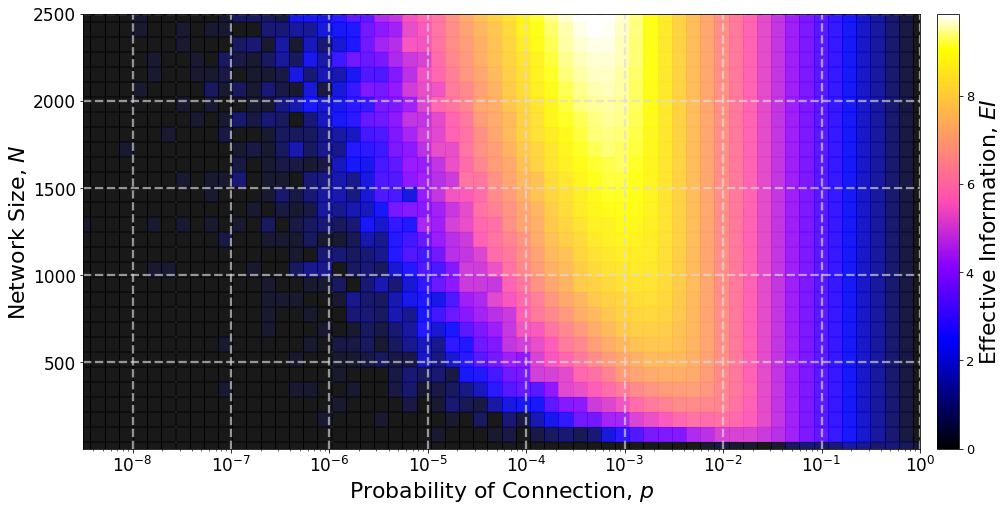

In [349]:
max_ei = max([max(p) for p in list(ei_dict.values())])-0.05
min_ei = 0
ei_range = np.linspace(min_ei, max_ei, len(ps))

fig, ax = plt.subplots(figsize=(18,8))

m = plt.cm.ScalarMappable(cmap=plt.cm.gnuplot2)
min_x = min(np.array([min(ei_dict.keys())]*len(network_sizes))*np.array(network_sizes))
max_x = max(np.array([max(ei_dict.keys())]*len(network_sizes))*np.array(network_sizes))

for N in ei_dict.keys():
    colors = [plt.cm.gnuplot2(np.array(ei_dict[N])/max_ei)][0]
    ax.scatter(ps, [N]*len(ps), s=200, alpha=0.9, marker="s", c=colors)
    ax.set_xscale('log')

m.set_array(ei_range)
cbar = plt.colorbar(m, pad=0.017)
cbar.ax.tick_params(labelsize=13) 
plt.grid(True, linestyle='--', linewidth=2.25, alpha=0.65, color='gainsboro')
cbar.set_label("Effective Information, $EI$", size=22)
plt.ylabel(r"Network Size, $N$", size=22)
plt.xlabel(r"Probability of Connection, $p$", size=22)
plt.xticks(size=17)
plt.yticks(size=17)
plt.xlim((min(ps), max(ps)))
plt.ylim((min(network_sizes), max(network_sizes)))

# plt.savefig("../figs/pngs/EffectiveInformation_ER_Growth_N2500_p.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EffectiveInformation_ER_Growth_N2500_p.pdf", bbox_inches='tight')
plt.show()

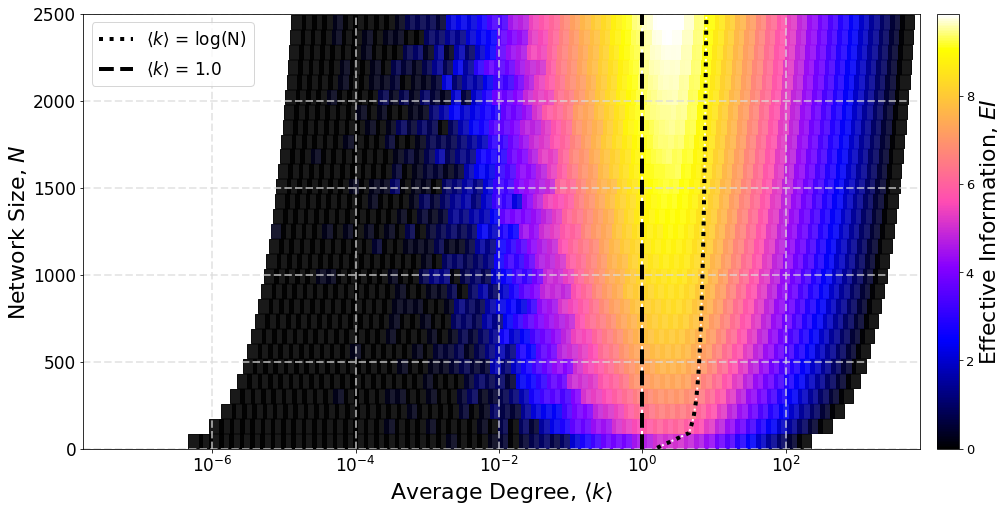

In [346]:
fig, ax = plt.subplots(figsize=(18,8))

m = plt.cm.ScalarMappable(cmap=plt.cm.gnuplot2)
min_x = min(np.array([min(ei_dict.keys())]*len(network_sizes))*np.array(network_sizes))
max_x = max(np.array([max(ei_dict.keys())]*len(network_sizes))*np.array(network_sizes))

for N in ei_dict.keys():
    colors = [plt.cm.gnuplot2(np.array(ei_dict[N])/max_ei)][0]
    ax.scatter(2*ps*N, [N-45]*len(ps), s=195, alpha=0.9, marker="s", c=colors)
    ax.set_xscale('log')

plt.plot(np.log(network_sizes), network_sizes, linewidth=2.0, linestyle=':', color='white')
plt.vlines(1., 1, max(network_sizes), linewidth=2.0, linestyles = '--', color='white')
plt.vlines(1., 1, max(network_sizes), linewidth=4.0, linestyles = '--', color='k', 
           label=r"$\langle k \rangle$ = 1.0")
plt.plot(np.log(network_sizes), network_sizes, linewidth=4.0, linestyle=':', color='k', 
           label=r"$\langle k \rangle$ = log(N)")

m.set_array(ei_range)
cbar = plt.colorbar(m, pad=0.017)
cbar.ax.tick_params(labelsize=13) 
cbar.set_label("Effective Information, $EI$", size=22)
plt.grid(True, linestyle='--', linewidth=2.0, alpha=0.65, color='gainsboro')
plt.ylabel(r"Network Size, $N$", size=22)
plt.xlabel(r"Average Degree, $\langle k \rangle$", size=22)
plt.xticks(size=17)
plt.yticks(size=17)
plt.xlim(min(ps)*min(network_sizes), max(ps)*max(network_sizes)*3)
plt.ylim(0, max(network_sizes))#
plt.legend(fontsize=17)

# plt.savefig("../figs/pngs/EffectiveInformation_ER_Growth_N2500_k.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EffectiveInformation_ER_Growth_N2500_k.pdf", bbox_inches='tight')
plt.show()

## 2.1.0 Comparing Star Networks to Ring Lattice Networks
______________________________________

In [354]:
ei_star = []
ei_line = []
net_size = []
network_sizes = np.array(sorted(list(set(np.logspace(0,3.5,50,dtype=int)))))
line_dict = {}
star_dict = {}

for N in network_sizes:
    G_star = nx.star_graph(N+1) # weird thing about this function: it produces a graph with N+1 nodes
    G_line = nx.watts_strogatz_graph(N+2, 2, 0)
    ei_star.append(get_ei(G_star, p0))
    ei_line.append(get_ei(G_line, p0))
    net_size.append(N+2)
    star_dict[N+2] = get_ei(G_star, p0)
    line_dict[N+2] = get_ei(G_line, p0)
    
star_x = list(star_dict.keys())[0::2]
star_y = list(star_dict.values())[0::2]
line_x = list(line_dict.keys())[0::2]
line_y = list(line_dict.values())[0::2]

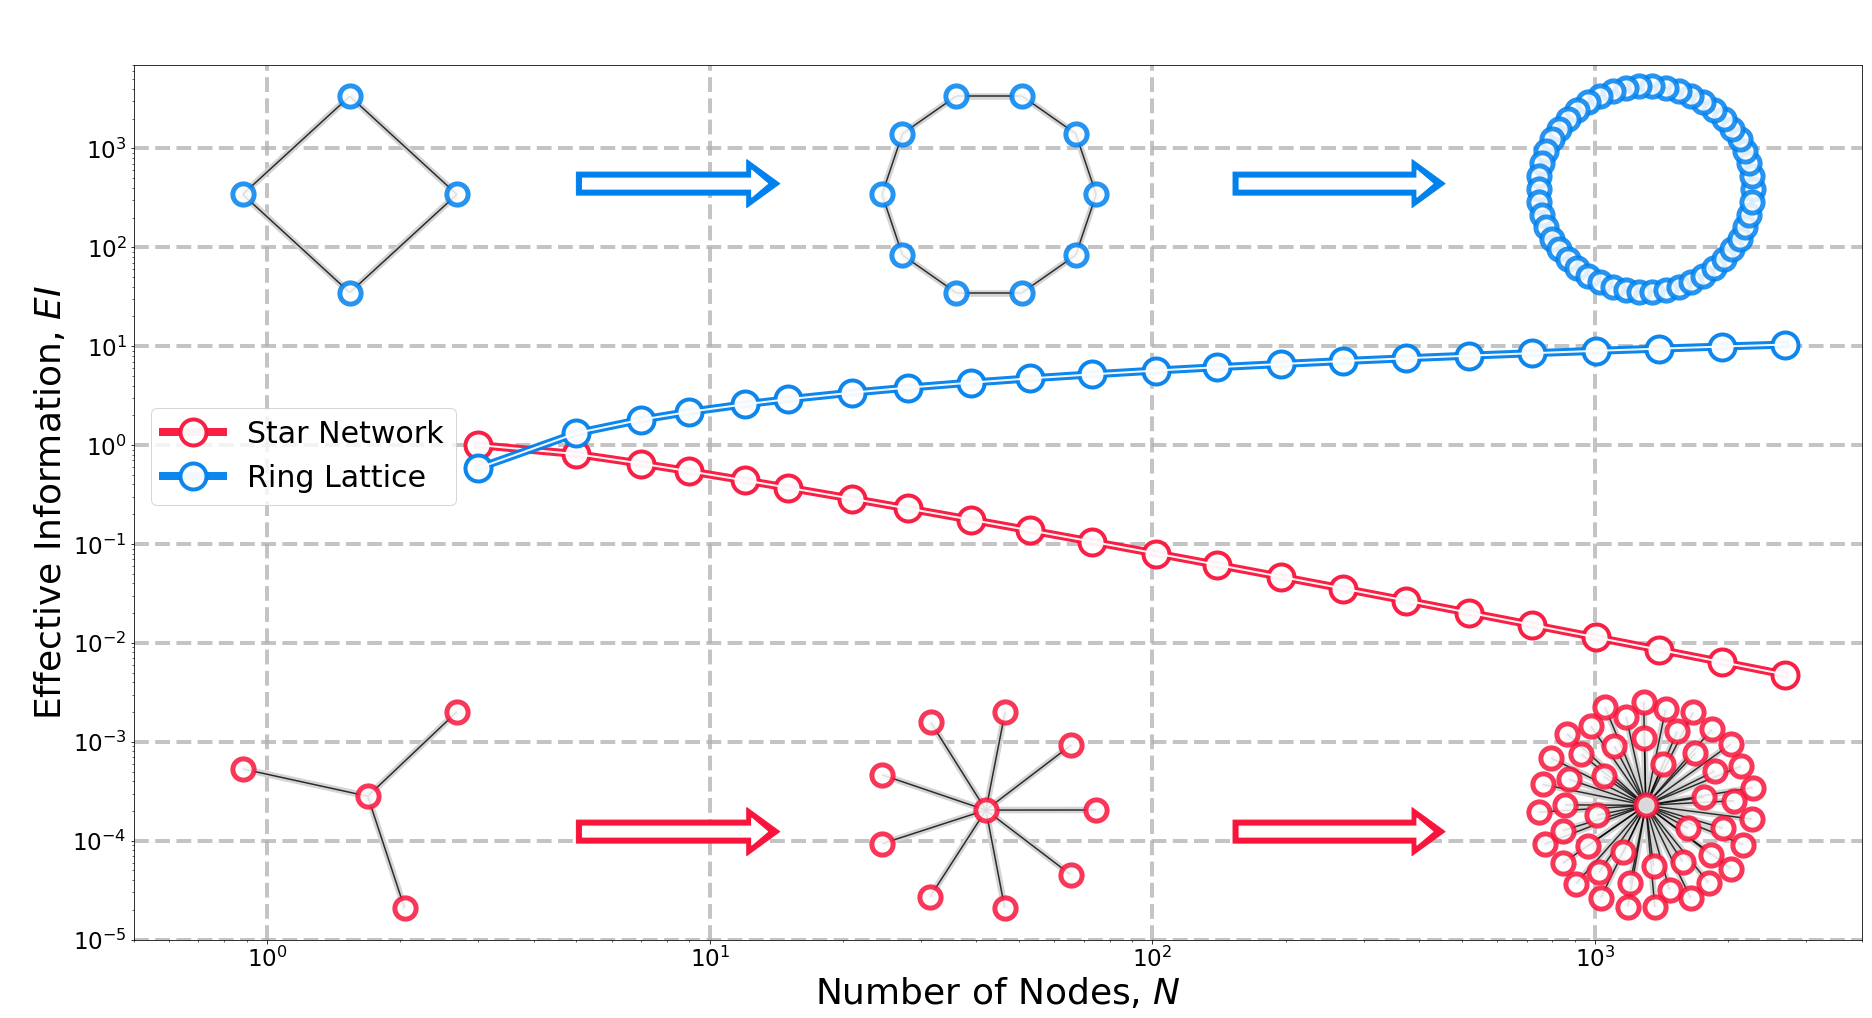

In [355]:
fig, ax = plt.subplots(figsize=(24,15))

plt.loglog(star_x, star_y, alpha=0.95, marker='o', markersize=26.0, markerfacecolor='w', 
           color='#f9143b', markeredgewidth=4, linewidth=8.0, label="Star Network")
plt.loglog(star_x, star_y, alpha=0.95, marker='', color='w', linewidth=2.0)
plt.loglog(line_x, line_y, alpha=0.95, marker='o', markersize=26.0, markerfacecolor='w', 
           color='#0081ee', markeredgewidth=4, linewidth=8.0, label="Ring Lattice")
plt.loglog(line_x, line_y, alpha=0.95, marker='', color='w', linewidth=2.0)#

plt.grid(True, linestyle='--', linewidth=4.0, alpha=0.75)
plt.xlabel("Number of Nodes, $N$", size=36)
plt.ylabel("Effective Information, $EI$", size=36)
plt.xticks(size=23)
plt.yticks(size=23)
plt.legend(fontsize=30, bbox_to_anchor=[0.195, 0.625])
plt.xlim((0.5,4000))
plt.ylim((0.00001, 7000.25))

###############
plt.axes([0.05, 0.68, 0.15, 0.22])
G = nx.watts_strogatz_graph(4, 2, 0.0)
plt.axis('off')
pos11 = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos11, node_color='white', node_size=450, 
                       linewidths=5, alpha=0.85).set_edgecolor('#0081ee')
nx.draw_networkx_edges(G, pos11, edge_color="lightgrey", width=6.55, alpha=0.98)
nx.draw_networkx_edges(G, pos11, edge_color="black", width=1.5, alpha=0.8)

plt.axes([0.42, 0.68, 0.15, 0.22])
G = nx.nx.watts_strogatz_graph(10, 2, 0.0)
plt.axis('off')
pos12 = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos12, node_color='white', node_size=450, 
                       linewidths=5, alpha=0.85).set_edgecolor('#0081ee')
nx.draw_networkx_edges(G, pos12, edge_color="lightgrey", width=6.55, alpha=0.98)
nx.draw_networkx_edges(G, pos12, edge_color="black", width=1.5, alpha=0.8)

plt.axes([0.8, 0.68, 0.15, 0.23])
G = nx.watts_strogatz_graph(50, 2, 0.0)
plt.axis('off')
pos13 = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos13, node_color='white', node_size=450, 
                       linewidths=5, alpha=0.85).set_edgecolor('#0081ee')
nx.draw_networkx_edges(G, pos13, edge_color="lightgrey", width=6.55, alpha=0.98)
nx.draw_networkx_edges(G, pos13, edge_color="black", width=1.5, alpha=0.8)

###############
plt.axes([-0.06, 0.76, 0.5, 0.20])
plt.axis('off')
style="Simple,head_length=33,head_width=48,tail_width=23"
arrow11 = arrow11 = mpatches.FancyArrowPatch((0.63,0.2), (0.870,0.2), 
                                             arrowstyle=style, color="#0081ee")
plt.gca().add_patch(arrow11)
style="Simple,head_length=16,head_width=27,tail_width=11"
arrow12 = arrow12 = mpatches.FancyArrowPatch((0.637,0.2), (0.856,0.2), 
                                             arrowstyle=style, color ='w')
plt.gca().add_patch(arrow12)

plt.axes([0.26, 0.76, 0.5, 0.20])
plt.axis('off')
style="Simple,head_length=33,head_width=48,tail_width=23"
arrow21 = arrow21 = mpatches.FancyArrowPatch((0.75,0.2), (1.0,0.2), 
                                             arrowstyle=style, color="#0081ee")
plt.gca().add_patch(arrow21)
style="Simple,head_length=16,head_width=27,tail_width=11"
arrow22 = arrow22 = mpatches.FancyArrowPatch((0.757,0.2), (0.986,0.2), 
                                             arrowstyle=style, color ='w')
plt.gca().add_patch(arrow22)

###############
plt.axes([0.05, 0.11, 0.15, 0.22])
G = nx.star_graph(3)
plt.axis('off')
pos21 = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos21, node_color='white', node_size=450, 
                       linewidths=5, alpha=0.85).set_edgecolor('#f9143b')
nx.draw_networkx_edges(G, pos21, edge_color="lightgrey", width=6.55, alpha=0.98)
nx.draw_networkx_edges(G, pos21, edge_color="black", width=1.5, alpha=0.8)

plt.axes([0.42, 0.11, 0.15, 0.22])
G = nx.star_graph(9)
plt.axis('off')
pos22 = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos22, node_color='white', node_size=450, 
                       linewidths=5, alpha=0.85).set_edgecolor('#f9143b')
nx.draw_networkx_edges(G, pos22, edge_color="lightgrey", width=6.55, alpha=0.98)
nx.draw_networkx_edges(G, pos22, edge_color="black", width=1.5, alpha=0.8)

plt.axes([0.8, 0.11, 0.15, 0.23])
G = nx.star_graph(49)
plt.axis('off')
pos23 = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos23, node_color='white', node_size=450, 
                       linewidths=5, alpha=0.85).set_edgecolor('#f9143b')
nx.draw_networkx_edges(G, pos23, edge_color="lightgrey", width=6.55, alpha=0.98)
nx.draw_networkx_edges(G, pos23, edge_color="black", width=1.5, alpha=0.8)

###############
plt.axes([-0.06, 0.16, 0.5, 0.20])
plt.axis('off')
style="Simple,head_length=33,head_width=48,tail_width=23"
arrow11 = arrow11 = mpatches.FancyArrowPatch((0.63,0.2), (0.870,0.2), 
                                             arrowstyle=style, color="#f9143b")
plt.gca().add_patch(arrow11)
style="Simple,head_length=16,head_width=27,tail_width=11"
arrow12 = arrow12 = mpatches.FancyArrowPatch((0.637,0.2), (0.856,0.2), 
                                             arrowstyle=style, color ='w')
plt.gca().add_patch(arrow12)

plt.axes([0.26, 0.16, 0.5, 0.20])
plt.axis('off')
style="Simple,head_length=33,head_width=48,tail_width=23"
arrow21 = arrow21 = mpatches.FancyArrowPatch((0.75,0.2), (1.0,0.2), 
                                             arrowstyle=style, color="#f9143b")
plt.gca().add_patch(arrow21)
style="Simple,head_length=16,head_width=27,tail_width=11"
arrow22 = arrow22 = mpatches.FancyArrowPatch((0.757,0.2), (0.986,0.2), 
                                             arrowstyle=style, color ='w')#color="#0081ee",
plt.gca().add_patch(arrow22)

plt.subplots_adjust(top = .91, bottom = .1, right = 1, left = 0, hspace = 0, wspace = 0)
# plt.savefig("../figs/pngs/EffectiveInformation_Compare_StarLine.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EffectiveInformation_Compare_StarLine.pdf", bbox_inches='tight')
plt.show()

## End of Chapter 02. In Chapter 03, we will look at the $EI$ of network motifs
_______________

In [2]:
# under tests

In [162]:
def preferential_attachment_network(N, alpha=1.0, m=1):
    """
    sublinear, linear, or superlinear preferential attachment
    """
    G = nx.Graph()
    G.add_edge(0,1)
    for node_i in range(2,N):
        degrees = np.array(list(dict(G.degree()).values()))
        probs = (degrees**alpha) / sum(degrees**alpha)
        eijs = np.random.choice(G.number_of_nodes(), size=(m,), replace=False, p=probs)
        for node_j in eijs:
            G.add_edge(node_i, node_j)
    
    return G

In [289]:
p0 = 0.0
N = 2000
nsamps = 20
n_sim = 50
network_sizes = np.logspace(1, np.log10(N), nsamps, dtype=int)
alphas = np.array([0.0, 0.5, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.5])

In [290]:
ms = [1]
out_dict = {}

for alpha in alphas:
    print(alpha)
    alpha_temp = {}
    for m in ms:
        m_temp = []
        for N in network_sizes:
#             print(N)
            N_temp = []
            for num_sim in range(n_sim):
                G = preferential_attachment_network(N, alpha, m)

                N_temp.append(get_ei(G, p0))
            m_temp.append(N_temp)

        alpha_temp[m] = m_temp
        
    out_dict[alpha] = alpha_temp

0.0
0.5
1.0
1.2
1.4
1.6
1.8
2.0
2.5


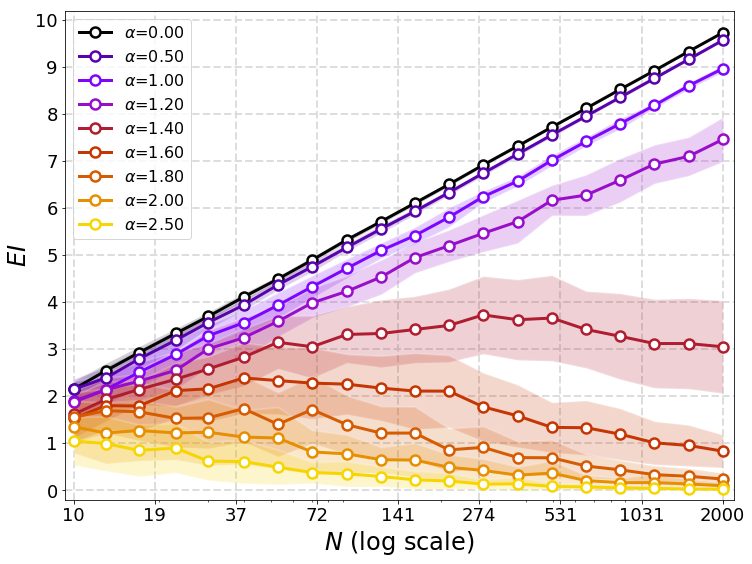

In [297]:
mult=1
plt.figure(figsize = (12*mult,9*mult))
m_shapes = dict(zip(ms,['o','^','s','+']))
alpha_colors = plt.cm.gnuplot(np.array(list(range(len(alphas))))/(max(np.array(list(range(len(alphas)))))+0.5))
alpha_colors = dict(zip(alphas, alpha_colors))
# alpha_colors = dict(zip(alphas, np.flip(alpha_colors, axis=0)))
labs = ['- Random Tree', '', '- Barabási-Albert', '', '', '', '', '', '- Star-like Tree']

maxEI=0
minEI=1
counter = 0
for alpha in alphas:
    for m in ms:
        data = out_dict[alpha]
        EI_N_list = np.mean(out_dict[alpha][m],axis=1)
        if max(EI_N_list) > maxEI:
            maxEI = max(EI_N_list)
        if min(EI_N_list) < minEI:
            minEI = min(EI_N_list)
        m_temp_stdv = np.std(out_dict[alpha][m],axis=1)
        fillb = EI_N_list-m_temp_stdv
        fillb[fillb<0] = 0
        plt.fill_between(network_sizes, fillb,EI_N_list+m_temp_stdv, 
                         facecolor=alpha_colors[alpha], alpha=0.2, edgecolor='w', linewidth=2.0)
        plt.loglog(network_sizes, EI_N_list, alpha=0.99, marker=m_shapes[1], 
             markersize=10.0, color=alpha_colors[alpha], markerfacecolor='w', 
             markeredgewidth=2.5, linewidth=3.0, 
             label=r"$\alpha$=%.2f"%(alpha))
#              label=r"$\alpha$=%.2f %s"%(alpha, labs[counter]))
    counter += 1

plt.xlabel(r"$N$ (log scale)", size=24)
# plt.xlabel("Number of Nodes, $N$", size=24)
plt.ylabel(r"$EI$", size=24)
# plt.ylabel("Effective Information, $EI$", size=24)
plt.yscale('linear')
xtix = np.logspace(np.log10(min(network_sizes)), np.log10(max(network_sizes)), 9)
ytix = np.linspace(0,10,11,dtype=int)
plt.xticks(xtix, np.array(xtix,dtype=int), size=18)
plt.yticks(ytix, np.round(ytix,2), size=18)
plt.xlim(min(xtix)-0.7, max(xtix)+200)
plt.ylim(-0.2, 10.2)
plt.grid(True, linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.95)
plt.legend(fontsize=16)
# plt.savefig("../figs/pngs/EI_compare_prefattach_alphas_m1.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EI_compare_prefattach_alphas_m1.pdf", bbox_inches='tight')
plt.show()

In [293]:
ps = np.logspace(-3.2,-1,9)
out_dictp = {}

for p in ps:
    print(p)
    p_temp = []
    for N in network_sizes:
#         print(N)
        N_temp = []
        for num_sim in range(n_sim):
            G = nx.erdos_renyi_graph(N, p)
            N_temp.append(get_ei(G, p0))
        
        p_temp.append(N_temp)
        
    out_dictp[p] = p_temp

0.00063095734448
0.00118850222744
0.00223872113857
0.00421696503429
0.00794328234724
0.0149623565609
0.0281838293126
0.0530884444231
0.1


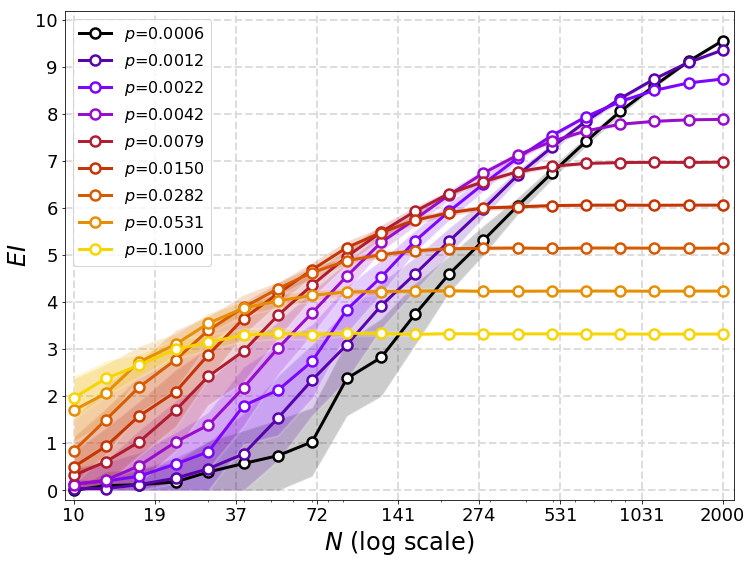

In [296]:
mult=1
plt.figure(figsize = (12*mult,9*mult))
m_shapes = dict(zip(ms,['o','^','s','+']))
p_colors = plt.cm.gnuplot(np.array(list(range(len(ps))))/(max(np.array(list(range(len(ps)))))+0.5))
p_colors = dict(zip(ps, p_colors))

maxEI=0
minEI=1
counter = 0
for p in ps:
    data = out_dictp[p]
    EI_N_list = np.mean(out_dictp[p],axis=1)
    if max(EI_N_list) > maxEI:
        maxEI = max(EI_N_list)
    if min(EI_N_list) < minEI:
        minEI = min(EI_N_list)
    m_temp_stdv = np.std(out_dictp[p],axis=1)
    fillb = EI_N_list-m_temp_stdv
    fillb[fillb<0] = 0
    plt.fill_between(network_sizes, fillb,EI_N_list+m_temp_stdv, 
                     facecolor=p_colors[p], alpha=0.2, edgecolor='w', linewidth=2.0)
    plt.loglog(network_sizes, EI_N_list, alpha=0.99, marker=m_shapes[1], 
         markersize=10.0, color=p_colors[p], markerfacecolor='w', 
         markeredgewidth=2.5, linewidth=3.0, 
         label=r"$p$=%.4f"%(p))
    counter += 1

plt.xlabel(r"$N$ (log scale)", size=24)
# plt.xlabel("Number of Nodes, $N$", size=24)
plt.ylabel(r"$EI$", size=24)
# plt.ylabel("Effective Information, $EI$", size=24)
plt.yscale('linear')
ytix = np.linspace(0,10,11,dtype=int)
plt.xticks(xtix, np.array(xtix,dtype=int), size=18)
plt.yticks(ytix, np.round(ytix,2), size=18)
plt.xlim(min(xtix)-0.7, max(xtix)+200)
plt.ylim(-0.2, 10.2)
plt.grid(True, linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.95)
plt.legend(fontsize=16)
# plt.savefig("../figs/pngs/EI_compare_ER_ps.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EI_compare_ER_ps.pdf", bbox_inches='tight')
plt.show()

### References:
- __[Barabási, A.-L. & Albert, R. (1999). Emergence of scaling in random networks. Science, 286 (October), 509–512. doi: 10.1126/science.286.5439.509](http://barabasi.com/f/67.pdf)__
- __[Barabási, A.-L. (2016). Network Science. Cambridge University Press. doi: ISBN:9781107076266](http://networksciencebook.com/)__
- __[Del Genio, C. I., Gross, T., & Bassler, K. E. (2011). All scale-free networks are sparse. Physical Review Letters, 107(17), 1–4. doi: 10.1103/PhysRevLett.107.178701](https://physics.aps.org/featured-article-pdf/10.1103/PhysRevLett.107.178701)__
- __[Erdös, P., & Rènyi, A. (1959). On random graphs. Publicationes Mathematicae, 6, 290–297. doi: 10.2307/1999405](http://snap.stanford.edu/class/cs224w-readings/erdos59random.pdf)__